# Class 6 Derivatives and Differential Equations

## Difference Equations
Function
$$ y = f(x) $$ for example $$y = x^2$$ for $x \in [1,5]$.

In [1]:
%pylab nbagg
x = linspace(5, 25, 25)

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


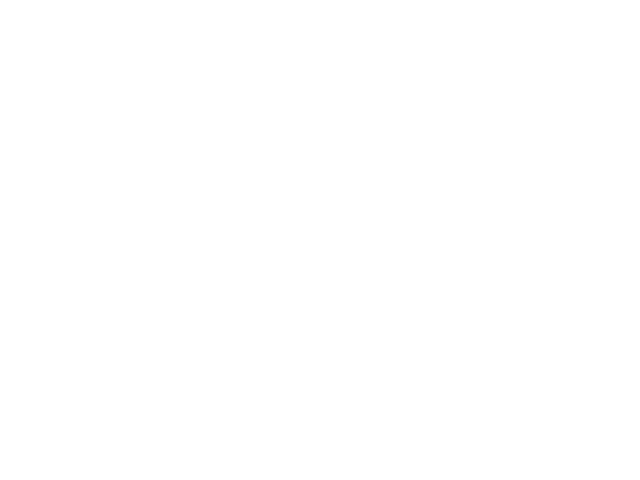

<IPython.core.display.Javascript object>


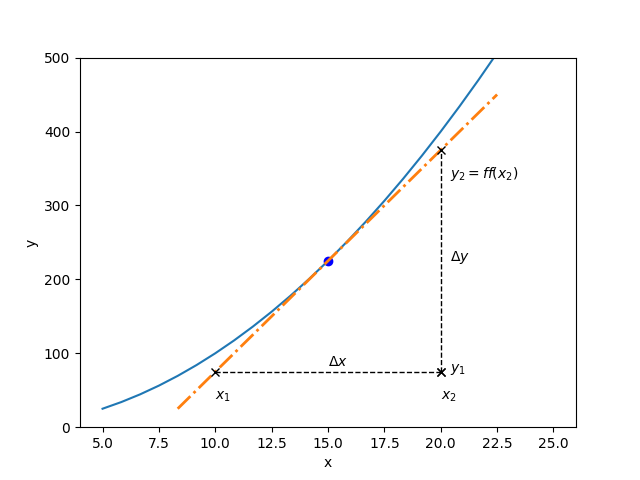

In [10]:
figure(1)
xl = 4; xr = 22
f = lambda x: x**2  # function
x0 = 15            # take derivative at x0
ff = lambda x: 2*x0*x + f(x0) - 2*x0**2   # derivative
close(1); figure(1)

plot(x, f(x)); xlabel('x'); ylabel('y'); ylim(0, 500)

if True:
    plot(x0, f(x0), 'bo')
    plot(x[4:22], ff(x[4:22]), '-.', lw = 2)
if True:
    x1 = x[6]; x2 = x[18]
    plot([x1, x2], [ff(x1), ff(x1)], 'k--x', lw = 1)
    plot([x2, x2], [ff(x1), ff(x2)], 'k--x', lw = 1)
    text(0.5*(x2+x1), 1.1*ff(x1), '$ \Delta x$')
    text(1.02*x2, 0.5*(ff(x1)+ff(x2)), '$ \Delta y$')
    text(x1, 0.5*ff(x1), '$x_1$')
    text(x2, 0.5*ff(x1), '$x_2$')
    text(1.02*x2, ff(x1), '$y_1$')
    text(1.02*x2, 0.9*ff(x2), '$y_2 = ff(x_2)$')

### Slope

$$
\frac{dy}{dx} = \frac{\Delta y}{\Delta x} = 
\frac{y_2 - y_1}{x_2 - x_1}
$$

## Derivative
The derivative $\frac{df}{dx}$ of a function $y=f(x)$ can be approximated by the difference equation 
$$ f'(x) \approx \frac{f(x+h) -f(x)}{h}.$$

Why? Rearrange the Taylor expansion of $f(x)$
$$
f(x+h) = f(x) + hf^\prime(x) + \frac{1}{2}h^2f^{\prime\prime}(x)
 + \frac{1}{6}h^3f^{\prime\prime\prime}(x) + \dots
$$
to solve for $f^\prime(x)$ and discard order two and higher terms
$$
\frac{1}{2}h^2f^{\prime\prime}(x)
 + \frac{1}{6}h^3f^{\prime\prime\prime}(x) + \dots
$$

In [6]:
def deriv1(f, x, h):
    dfdx = (f(x+h) - f(x)) / h
    return dfdx

In [7]:
deriv1(f, 1, 1.e-3) - 2.

0.0009999999996974651

## Errors
There are two basic sources of error! They have to do with accuracy and with precision.

**Accuracy:** How well does the discretized equation represent the original mathematical equation?
This is the truncation error. 

**Precision:** How well is the solution satisfying the discretized equation? This is limited by the roundoff error.

### Convergence test
In order to determine the accuracy of our solution scheme we study the behaviour of a particular solution scheme under grid (time and/or space) refinement. In our case this means we do a series of runs with decreasing `h`.

We use a convenient technique for _vectorizing_ a function which allows to evaluate an arbitrary function for a _parameter vector_. This way of doing it will not help performance. See an example below of how to do true multi-tasking.

In [11]:
# In order to vectorize wrap the function to isolate the
# variable over which wer should loop turn a scalar function
# into a vectorized function
def hdev(h):
    return deriv1(f, 1., h)
vhdev = vectorize(hdev)
h_pow = range(0, -14, -1)

<IPython.core.display.Javascript object>


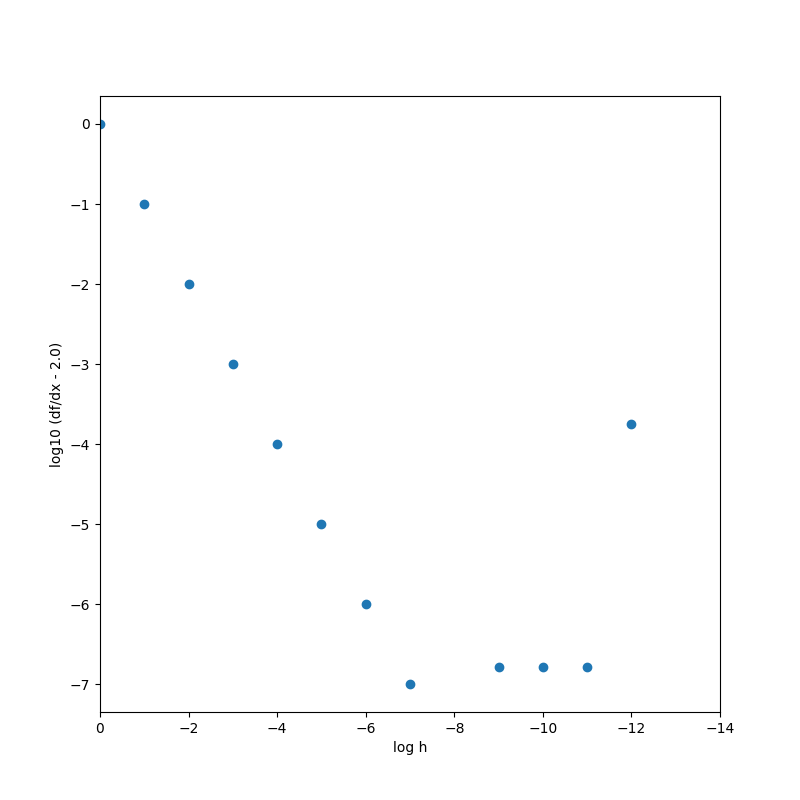

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


((0, -14),
 <matplotlib.text.Text at 0x7f6f6567ac88>)

In [15]:
h = 10**array(h_pow, dtype = float)
figure(2, figsize = (8,8))
plot(h_pow, log10(vhdev(h)-2.0), 'o')
xlim(0, -14), ylabel('log10 (df/dx - 2.0)'), xlabel('log h')

## Ordinary Differential Equations

### Euler Step
Take the simplest, first order ODE
$$
y^\prime = f(y,x)
$$
where the right-hand side (RHS) is the function $f(y,x)$ that specifies the derivative $y^\prime = \frac{dy}{dx}$. We are looking for the function $y(x)$, but here not the algebraic expression but the numerical values. For a time dependent problem $x = t$. 

Take for example $f (y,x) = 2x$, then we know that $y(x) = x^2$. Let's pretend we do not know the answer, but the initial conditions $y(0) = 0$. How can we numerically calculate $y(x)$ for a series of discrete values $x_i$?

In [18]:
y = []; y.append(0)
x = []; x.append(0)
rhs_f = lambda x: 2*x
x_thing = x[0]; y_thing = y[0]

dx = 1
x_end = 4.

while x_thing <= x_end + dx:
    y_thing += dx * rhs_f(x_thing)
    x_thing += dx
    print(x_thing, y_thing)
    x.append(x_thing); y.append(y_thing)

1 0
2 2
3 6
4 12
5 20
6 30


<IPython.core.display.Javascript object>


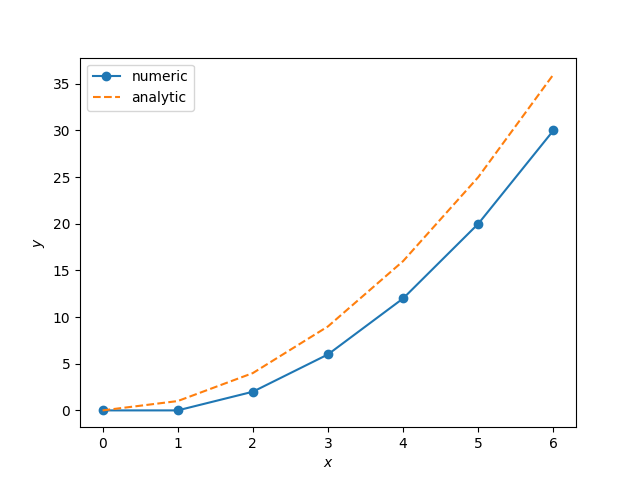

In [19]:
figure(4)
plot(x, y, 'o-', label = 'numeric')
plot(x, array(x)**2, '--', label = 'analytic')
legend()
xlabel('$x$')
ylabel('$y$')